<a href="https://colab.research.google.com/github/harshi2812/stockmarketpredictor/blob/main/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import os
df= pd.read_csv('/content/infolimpioavanzadoTarget.csv')
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [ ]:
df.shape
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 3.3+ MB


,0
date,0
open,0
high,0
low,0
close,0
adjclose,0
volume,0
ticker,0
RSIadjclose15,30
RSIvolume15,30


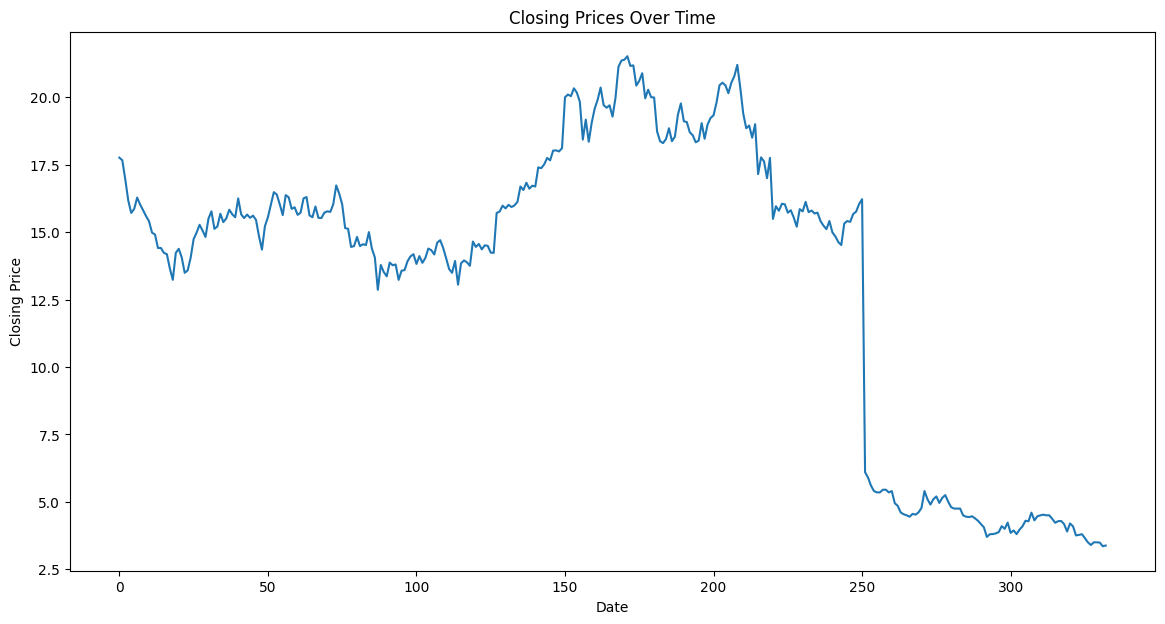

In [110]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


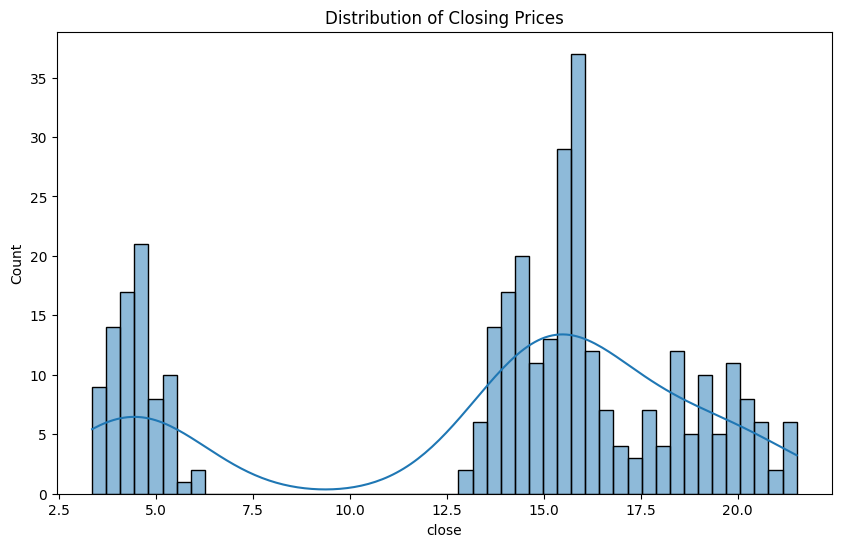

In [111]:

plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


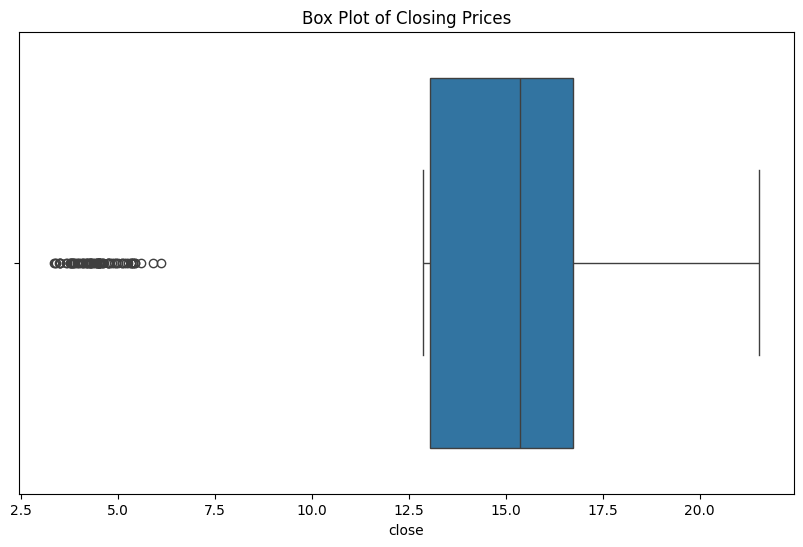

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['close'])
plt.title('Box Plot of Closing Prices')
plt.show()


In [ ]:
data_new = df[['date','open', 'high', 'low', 'close']]
data_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
328,2022-04-25,3.385000,3.500000,3.305000,3.500000
329,2022-04-26,3.500000,3.750000,3.355000,3.500000
330,2022-04-27,3.575000,3.575000,3.300000,3.490000
331,2022-04-28,3.400000,3.490000,3.350000,3.355000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data_new.isnull().sum()


,0
date,0
open,0
high,0
low,0
close,0


In [105]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day_of_Week'] = df['date'].dt.dayofweek
df.drop('date', axis=1, inplace=True)


KeyError: 'date'

In [ ]:
data_new2 = df[['Year','Month','open', 'high', 'low', 'close']]
data_new2

,Year,Month,open,high,low,close
0,2022,1,17.799999,18.219000,17.500000,17.760000
1,2022,1,17.700001,18.309999,17.620001,17.660000
2,2022,1,17.580000,17.799999,16.910000,16.950001
3,2022,1,16.650000,16.879999,16.139999,16.170000
4,2022,1,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...,...
328,2022,4,3.385000,3.500000,3.305000,3.500000
329,2022,4,3.500000,3.750000,3.355000,3.500000
330,2022,4,3.575000,3.575000,3.300000,3.490000
331,2022,4,3.400000,3.490000,3.350000,3.355000


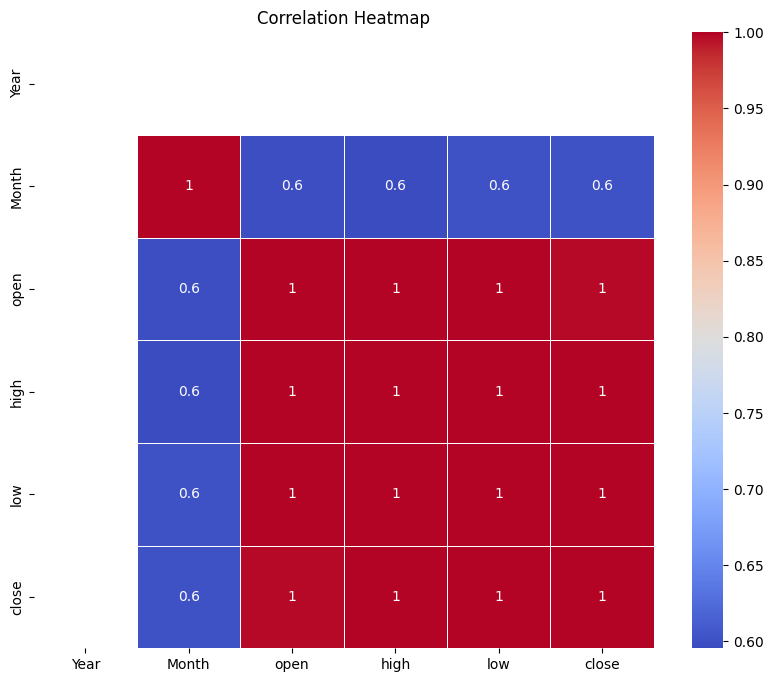

In [ ]:
correlation_matrix = data_new2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data_new2["tomorrow"]= data_new["close"].shift(-1)
data_new2

<ipython-input-93-50f26b6531e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new2["tomorrow"]= data_new["close"].shift(-1)


,Year,Month,open,high,low,close,tomorrow
0,2022,1,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022,1,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022,1,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022,1,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022,1,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...,...
328,2022,4,3.385000,3.500000,3.305000,3.500000,3.500000
329,2022,4,3.500000,3.750000,3.355000,3.500000,3.490000
330,2022,4,3.575000,3.575000,3.300000,3.490000,3.355000
331,2022,4,3.400000,3.490000,3.350000,3.355000,3.380000


In [ ]:
data_new2["target"] = data_new2["tomorrow"] > data_new2["close"].astype(float)
data_new2

<ipython-input-94-03e8ab17d6e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new2["target"] = data_new2["tomorrow"] > data_new2["close"].astype(float)


,Year,Month,open,high,low,close,tomorrow,target
0,2022,1,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022,1,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022,1,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022,1,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022,1,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...,...
328,2022,4,3.385000,3.500000,3.305000,3.500000,3.500000,False
329,2022,4,3.500000,3.750000,3.355000,3.500000,3.490000,False
330,2022,4,3.575000,3.575000,3.300000,3.490000,3.355000,False
331,2022,4,3.400000,3.490000,3.350000,3.355000,3.380000,True


In [ ]:
#For Decision Tree
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)
train = data_new2.iloc[:-100]
test = data_new2.iloc[-100:]

In [ ]:
predictors = ["open", "high", "low", "close"] #Exempt the datetime so that the model doesnt train on it. So as to prevent data leakage
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
pred = model.predict(test[predictors])
print("Predictions:", pred)

Predictions: [False False False  True False  True  True False False False False False
 False  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [ ]:
# Evaluate model performance
# Consider using accuracy, recall, F1 score, or ROC AUC depending on your needs
accuracy = (pred == test["target"]).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.44


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
# Split data into training and testing sets
X = data_new2[predictors]
y = data_new2["target"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Model initialization
model = RandomForestClassifier(random_state=1)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.73      0.63        15
        True       0.71      0.53      0.61        19

    accuracy                           0.62        34
   macro avg       0.63      0.63      0.62        34
weighted avg       0.64      0.62      0.62        34

ROC AUC Score: 0.58


In [109]:
import pickle

pickle.dump(data_new2,open('data_new2.pkl','wb'))
pickle.dump(best_model,open('best_model.pkl','wb'))
data_new2

,Year,Month,open,high,low,close,tomorrow,target
0,2022,1,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022,1,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022,1,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022,1,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022,1,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...,...
328,2022,4,3.385000,3.500000,3.305000,3.500000,3.500000,False
329,2022,4,3.500000,3.750000,3.355000,3.500000,3.490000,False
330,2022,4,3.575000,3.575000,3.300000,3.490000,3.355000,False
331,2022,4,3.400000,3.490000,3.350000,3.355000,3.380000,True
